# NSP1 Abundance Comparison

We compare the abundance of NSP1 expression in our data set to an external dataset (GSE150316).
For this we picked the lung samples and mapped them to modified reference. Similarly we mapped our data to a modified reference. After counting, normalizing and correcting, we compare the relative abundance of NSP1 expression between between experiments.

## NSP1 Reference Original
The original NSP1 & NSP2 sequences were obtained from the virus genome obtained from 
[https://www.ncbi.nlm.nih.gov/nuccore/NC_045512](https://www.ncbi.nlm.nih.gov/nuccore/NC_045512).

For NSP1, we took the nucleotides from position  265 to 805    
For NSP2, we took the nucleotides from position  805 to 2719    
We added the start codon "ATG" to the beginning of the NSP2 sequence.    


## NSP1 Reference Modified
We used the following sequence of NSP1 for **our** data
```
>NSP1
ATGGAGAGTCTTGTACCCGGCTTTAACGAGAAAACACATGTTCAATTGTCATTGCCTGTGCTGCAAGTCCGGGACGTACTGGTTAGGGGGT
TCGGAGATTCAGTAGAAGAGGTGCTGTCTGAGGCGAGGCAACATTTGAAAGACGGGACGTGCGGGCTGGTTGAGGTGGAAAAGGGAGT
ACTTCCACAGTTGGAACAACCGTATGTTTTTATTAAGCGGAGTGATGCCAGGACTGCGCCGCACGGTCATGTCATGGTTGAGCTTGTCGCA
GAGCTTGAAGGCATTCAATATGGGCGCTCCGGTGAAACTCTTGGAGTACTTGTGCCGCACGTAGGCGAAATTCCAGTGGCATATCGGAAG
GTGCTGTTGAGAAAAAATGGGAACAAGGGCGCAGGGGGCCACAGTTATGGAGCCGACCTCAAATCCTTTGACCTTGGCGACGAGTTGGG
GACAGATCCCTACGAGGATTTCCAGGAAAACTGGAATACGAAACATAGCAGTGGCGTTACTCGCGAGTTGATGCGCGAACTGAACGGCG
GC
```

For NSP2, we use the following sequence
```
>NSP2
ATGGCCTACACGCGATATGTTGACAACAACTTTTGTGGACCTGACGGCTACCCTCTTGAATGTATTAAGGATCTTCTGGCTCGCGCTGGAAA
AGCCAGTTGTACACTGTCTGAGCAGCTCGACTTTATAGATACAAAGCGGGGGGTCTATTGTTGCCGAGAGCATGAACATGAGATCGCATG
GTATACGGAGCGCTCTGAAAAAAGCTATGAATTGCAGACACCCTTTGAAATTAAGTTGGCGAAAAAGTTCGATACATTCAATGGTGAGTG
CCCCAACTTTGTCTTTCCCCTTAACAGTATCATTAAAACAATCCAGCCCCGGGTGGAAAAGAAGAAATTGGATGGATTCATGGGCAGGAT
CAGAAGTGTTTACCCAGTGGCATCCCCTAATGAATGCAATCAGATGTGCCTGTCCACGCTGATGAAATGCGACCACTGCGGTGAAACGTC
TTGGCAAACGGGGGACTTTGTAAAAGCAACGTGCGAGTTTTGCGGAACTGAGAACTTGACAAAGGAGGGAGCGACTACATGTGGATACC
TGCCTCAGAACGCGGTAGTGAAAATATACTGTCCTGCCTGTCACAATTCTGAAGTTGGGCCTGAACATAGCTTGGCCGAATACCATAACG
AAAGTGGATTGAAGACAATTCTTCGCAAAGGAGGCCGGACTATCGCGTTCGGGGGCTGCGTGTTTAGCTATGTAGGATGTCATAATAAAT
GCGCATATTGGGTTCCACGAGCTAGCGCAAACATAGGCTGCAACCACACAGGCGTAGTTGGTGAGGGATCAGAAGGTCTTAATGATAAC
TTGCTCGAAATATTGCAAAAGGAAAAAGTCAACATAAATATTGTAGGAGATTTTAAATTGAATGAAGAGATTGCGATAATCCTTGCGTCAT
TTTCCGCAAGTACGAGTGCGTTCGTTGAGACTGTAAAGGGGCTCGACTATAAAGCGTTTAAGCAAATAGTAGAGAGCTGCGGAAACTTTA
AAGTTACGAAGGGAAAAGCCAAAAAAGGTGCATGGAACATTGGCGAGCAGAAGAGTATACTGTCCCCCCTGTACGCCTTCGCGTCAGA
AGCAGCTCGAGTAGTTAGAAGTATATTCTCACGAACGCTCGAGACGGCGCAGAATAGTGTGCGCGTGCTCCAGAAGGCTGCTATTACGAT
CCTCGACGGCATATCCCAGTATTCTCTTCGACTGATTGATGCTATGATGTTCACCTCCGACTTGGCGACGAACAATCTCGTAGTTATGGCTTA
TATCACCGGCGGCGTTGTACAATTGACGTCTCAGTGGCTGACGAACATCTTCGGAACCGTGTACGAGAAGCTCAAACCAGTTCTTGATTGG
CTTGAAGAAAAGTTTAAGGAAGGCGTCGAGTTTCTCCGGGATGGGTGGGAAATTGTTAAGTTTATCTCCACCTGCGCGTGTGAAATTGTGG
GAGGGCAAATTGTCACCTGCGCCAAGGAAATTAAAGAGTCAGTTCAGACGTTTTTTAAACTTGTGAACAAATTCCTTGCTCTCTGTGCGGAT
AGTATAATCATCGGTGGGGCGAAGTTGAAAGCACTCAATCTTGGTGAAACTTTCGTGACCCACAGCAAAGGCCTGTATAGGAAGTGTGTT
AAAAGCAGGGAGGAGACCGGTCTTCTTATGCCGCTGAAGGCGCCCAAAGAGATAATTTTTCTTGAGGGGGAAACTCTTCCGACCGAAGT
GCTCACGGAAGAAGTAGTTCTGAAAACAGGGGACCTTCAACCACTGGAGCAACCGACCTCTGAGGCAGTTGAAGCGCCGCTCGTCGGA
ACTCCTGTATGTATTAACGGCCTCATGCTGTTGGAAATTAAGGATACGGAGAAGTACTGTGCACTGGCCCCCAACATGATGGTCACGAAC
AACACCTTTACCCTTAAGGGCGGC
```

## Sanitiy Check for NSP1 Sequences

Both NSP1 sequences (from the virus genome and our modified version) gives the follwing protein sequence:

```
MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHLKDGTCGLVEVEKGVLPQLEQPYVFIKRSDARTAPHGHVMVELVAELEGIQYGRSGETLGVLVPHVGEIPVAYRKVLLRKNGNKGAGGHSYGADLKSFDLGDELGTDPYEDFQENWNTKHSSGVTRELMRELNGG
```

Hence both the virus RNA and our RNA vector produces the same protein.

## Mapping Reference for Extrernal Data

Let `T` be the reference of the human trasscriptome we used to process our data earlier. Let `NSP1` and `NSP2` be the nucleotides sequences of NSP1 and NSP2, respectively. We mapped the external data to the modified reference
```
NSP1 + NSP2 + T
```

## Mapping Reference for our Data
Let `T` be the reference of the human trasscriptome we used to process our data earlier. Let `NSP1_mod` and `NSP2_mod` be the nucleotides sequences of NSP1 and NSP2, respectively. We mapped the our data to the modified reference
```
NSP1_mod + NSP2_mod + T
```

## Normalization

NSP1 counts were divided to the total number of mapped reads and then multiplied by 10^6. We call this **reads per million**.

## NSP1 Count Correction

For the external data, we were given a list of RNA-Seq coverage table. This table can be converted to raios by dividing the values by 100. Next, we divided **reads per million** by the ratios. The resulting numbers are called corrected counts. We used the corrected counts to compare the abundace of NSP1 across experiments.

In [1]:
import glob,os

import pandas as pd
import numpy as np

import gzip

In [2]:
cenik_stats_folder    = "./mapping/ceniklab"
external_stats_folder = "./mapping/GSE150316" 
GSE149973_stats_folder = "./mapping/GSE149973"
GSE159191_stats_folder = "./mapping/GSE159191"

In [3]:
stats_file_extension         = "/*stats.gz"
pre_cenik_stats_files        = glob.glob(cenik_stats_folder     + stats_file_extension)
pre_external_stats_files     = glob.glob(external_stats_folder  + stats_file_extension)
pre_GSE149973_stats_files    = glob.glob(GSE149973_stats_folder + stats_file_extension)
pre_GSE159191_stats_files    = glob.glob(GSE159191_stats_folder + stats_file_extension)

In [4]:
"""
def get_cenik_exp_names(file_list):
    result_couples = []
    
    for f in file_list:
        exp_name = os.path.basename(f).split(".")[0]
        exp_name = exp_name.replace("20200717-", "").replace("-setB", "")
        result_couples.append( (exp_name, f) )
        
    return result_couples
"""

def get_exp_names(file_list):
    result = []
    
    for f in file_list:
        exp_name = os.path.basename(f).split(".")[0]
        result.append( exp_name )
        
    return result

In [5]:
cenik_experiments    = get_exp_names(pre_cenik_stats_files)
external_experiments = get_exp_names(pre_external_stats_files)
GSE149973_experiments = get_exp_names(pre_GSE149973_stats_files)
GSE159191_experiments = get_exp_names(pre_GSE159191_stats_files)

In [6]:
"""
def get_number_of_raw_reads(exp_name, folder):
    bt2_log_file = os.path.join(folder, exp_name + ".mapping.log")
    
    with open(bt2_log_file, "rt") as input_stream:
        file_lines = input_stream.readlines()
        
    return int(file_lines[0].split()[0])
"""

def get_count_stats( exp_name, folder ):
    stats_file = os.path.join(folder, exp_name + ".stats.gz")
    result = {"NSP1": 0, "NSP2": 0, "total" : 0}
    
    with gzip.open(stats_file, "rt") as input_stream:
        for this_line in input_stream:
            contents = this_line.split()
            
            if contents[0].upper() == "NSP1":
                result["NSP1"] += int(contents[2])
            elif contents[0].upper() == "NSP2":
                result["NSP2"] += int(contents[2])
                
            result["total"] += int(contents[2])
            
    return result
        

def get_stats_main( experiment_names, folder ):
    result = dict()
    
    for e in experiment_names:
        #result[e] = { "NSP1" : 0, "NSP2" : 0,  "total_mapped" : 0, "total_raw" : 0 }
        
        count_stats = get_count_stats( e, folder )
        #raw_reads   = get_number_of_raw_reads( e, folder )
        
        result[e]                 = dict()
        result[e]["NSP1"]         = count_stats["NSP1"]
        result[e]["NSP2"]         = count_stats["NSP2"]
        result[e]["total_mapped"] = count_stats["total"]
        #result[e]["total_raw"]    = raw_reads
        
    return result


In [7]:
get_count_stats('20200717-NSP1-RNA-seq-HEK-1-setB', cenik_stats_folder)

{'NSP1': 13645, 'NSP2': 451, 'total': 1919963}

In [8]:
get_count_stats('20200717-NSP2-RNA-seq-HEK-2-setB', cenik_stats_folder)

{'NSP1': 55, 'NSP2': 149623, 'total': 2948910}

In [9]:
ceniklab_stats_dict = get_stats_main(cenik_experiments, cenik_stats_folder )
external_stats_dict = get_stats_main(external_experiments, external_stats_folder )
#to be deleted
#GSE149973_stats_dict = get_stats_main(GSE149973_experiments, GSE149973_stats_folder )
GSE159191_stats_dict = get_stats_main(GSE159191_experiments, GSE159191_stats_folder )

In [10]:
ceniklab_counts_df = pd.DataFrame.from_dict(ceniklab_stats_dict).transpose()
ceniklab_counts_df["NSP1_per_Mil"] = (ceniklab_counts_df.NSP1 / ceniklab_counts_df.total_mapped) * 1000000
ceniklab_counts_df["NSP2_per_Mil"] = (ceniklab_counts_df.NSP2 / ceniklab_counts_df.total_mapped) * 1000000

In [11]:
external_counts_df = pd.DataFrame.from_dict(external_stats_dict).transpose()
external_counts_df["NSP1_per_Mil"] = (external_counts_df.NSP1 / external_counts_df.total_mapped) * 1000000
external_counts_df["NSP2_per_Mil"] = (external_counts_df.NSP2 / external_counts_df.total_mapped) * 1000000

In [12]:
# to be deleted
#GSE149973_counts_df = pd.DataFrame.from_dict(GSE149973_stats_dict).transpose()
#GSE149973_counts_df["NSP1_per_Mil"] = (GSE149973_counts_df.NSP1 / GSE149973_counts_df.total_mapped) * 1000000
#GSE149973_counts_df["NSP2_per_Mil"] = (GSE149973_counts_df.NSP2 / GSE149973_counts_df.total_mapped) * 1000000

In [13]:
GSE159191_counts_df = pd.DataFrame.from_dict(GSE159191_stats_dict).transpose()
GSE159191_counts_df["NSP1_per_Mil"] = (GSE159191_counts_df.NSP1 / GSE159191_counts_df.total_mapped) * 1000000
GSE159191_counts_df["NSP2_per_Mil"] = (GSE159191_counts_df.NSP2 / GSE159191_counts_df.total_mapped) * 1000000

## NSP1 Counts in CenikLab Data

In [14]:
ceniklab_counts_df

,NSP1,NSP2,total_mapped,NSP1_per_Mil,NSP2_per_Mil
20210318-NSP1-H1299-B,16484,1244,10414385,1582.810699,119.450164
20210318-NSP1-H1299-C,4825,325,2840134,1698.863504,114.431220
20210318-NSP2-H1299-C,31,256879,11777991,2.632028,21810.086287
20210318-NSP2-H1299-B,30,232964,9196661,3.262053,25331.367547
20210318-NSP1-H1299-A,8922,1136,6344717,1406.209292,179.046599
20200717-WT3-RNA-seq-HEK-3-setB,42,491,3030749,13.857961,162.006158
20200717-NSP2-RNA-seq-HEK-1-setB,34,117899,2450175,13.876560,48118.603773
20200717-NSP2-RNA-seq-HEK-3-setB,37,117091,2448191,15.113200,47827.559206
20200717-NSP1-RNA-seq-HEK-3-setB,9432,298,1428006,6605.014265,208.682597
20200717-NSP1-RNA-seq-HEK-1-setB,13645,451,1919963,7106.907789,234.900360


## NSP1 Counts in Human Lung Cells

In [15]:
external_counts_df

,NSP1,NSP2,total_mapped,NSP1_per_Mil,NSP2_per_Mil
GSM4698533,0,0,630516,0.000000,0.000000
GSM4546586,0,1,7156976,0.000000,0.139724
GSM4698526,284,1567,2265411,125.363565,691.706715
GSM4698534,0,0,528012,0.000000,0.000000
GSM4698561,0,0,1103573,0.000000,0.000000
GSM4546598,1,10,2183520,0.457976,4.579761
GSM4546584,0,1,1208740,0.000000,0.827308
GSM4698537,0,11,1548455,0.000000,7.103855
GSM4698545,0,6,1298208,0.000000,4.621756
GSM4698532,0,1,630044,0.000000,1.587191


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]

import numpy as np

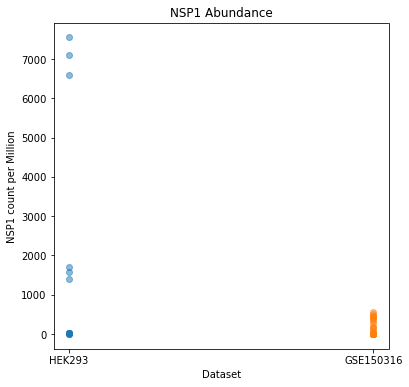

In [17]:
fig, ax = plt.subplots()

ceniklab_nsp1_norm = ceniklab_counts_df.NSP1_per_Mil
ceniklab_x         = [1 for x in ceniklab_nsp1_norm]

ax.plot(ceniklab_x, ceniklab_nsp1_norm, "o", alpha = 0.5)

external_nsp1_norm = external_counts_df.NSP1_per_Mil
external_x         = [2 for x in external_nsp1_norm]

plt.xlabel("Dataset")
plt.ylabel("NSP1 count per Million")
plt.title("NSP1 Abundance")

ax.plot(external_x, external_nsp1_norm, "o", alpha = 0.5, linewidth = 40);
plt.xticks((1,2), labels = ("HEK293", "GSE150316"), rotation = "horizontal");
plt.savefig("NSP1_abundance.pdf")

We took these data from the authors of the study.

In [18]:
initial_rnaseq_coverage = [np.float32(-1) for x in range(len(external_counts_df.index))]

RNASEQ_COVERAGE = {\
    "GSM4546576" : 99.96,
    "GSM4546577" : 99.96,
    "GSM4546578" : 99.96,
    "GSM4546579" : 99.96,
    "GSM4546581" : 9.4,
    "GSM4546582" : 9.4,
    "GSM4546584" : 9.4,
    "GSM4546586" : 1.27,
    "GSM4546588" : 1.27,
    "GSM4546589" : 0.15,
    "GSM4546592" : 0.15,
    "GSM4546596" : 24.27,
    "GSM4546597" : 24.27,
    "GSM4546598" : 24.27,
    "GSM4546599" : 24.27,
    "GSM4546601" : 24.27,
    "GSM4698531" : 0.17,
    "GSM4698532" : 0.17,
    "GSM4698533" : 0.17,
    "GSM4698534" : 0.17,
    "GSM4698535" : 0.17,
    "GSM4698536" : 10.45,
    "GSM4698537" : 10.45,
    "GSM4698538" : 10.45,
    "GSM4698539" : 10.45,
    "GSM4698540" : 10.45,
    "GSM4698544" : 45.16,
    "GSM4698545" : 45.16,
    "GSM4698546" : 45.16,
    "GSM4698547" : 45.16,
    "GSM4698548" : 45.16,
    "GSM4698549" : 99.98,
    "GSM4698550" : 99.98,
    "GSM4698551" : 99.98,
    "GSM4698552" : 99.98,
    "GSM4698553" : 99.98,
    "GSM4698554" : 55.17,
    "GSM4698555" : 0.99,
    "GSM4698556" : 100.00,
    "GSM4698557" : 96.96,
    "GSM4698521" : 1.52,
    "GSM4698522" : 1.52,
    "GSM4698523" : 1.52,
    "GSM4698526" : 75.13,
    "GSM4698527" : 75.13,
    "GSM4698528" : 75.13
}

In [19]:
external_counts_df["RNA_SEQ_COVERAGE"] = initial_rnaseq_coverage

for k, v in RNASEQ_COVERAGE.items():
    external_counts_df.at[k, "RNA_SEQ_COVERAGE"] = v

Note that we multiply the normalzied ratio by 100 because the reported values are percentages not ratios. Multiplying by 100 will enable us to compare the values to our own dataset.

In [20]:
normalized_counts = external_counts_df["NSP1_per_Mil"] 
correction_denom  = external_counts_df["RNA_SEQ_COVERAGE"]
external_counts_df["corrected_NSP1"]= \
       (normalized_counts / correction_denom) *100


In [21]:
external_counts_corrected_df = \
    external_counts_df[ external_counts_df.corrected_NSP1 > 0 ]

external_counts_corrected_df[["NSP1", "NSP1_per_Mil", "RNA_SEQ_COVERAGE" , "corrected_NSP1"]]

,NSP1,NSP1_per_Mil,RNA_SEQ_COVERAGE,corrected_NSP1
GSM4698526,284,125.363565,75.13,166.862193
GSM4546598,1,0.457976,24.27,1.887005
GSM4698554,3,14.106229,55.17,25.568659
GSM4546589,2,2.380049,0.15,1586.699019
GSM4698547,13,5.947942,45.16,13.170819
GSM4698549,156,64.336450,99.98,64.349320
GSM4698556,561,465.736411,100.00,465.736411
GSM4698550,719,568.725627,99.98,568.839395
GSM4698528,25,11.377620,75.13,15.143911
GSM4698552,1408,511.842539,99.98,511.944928


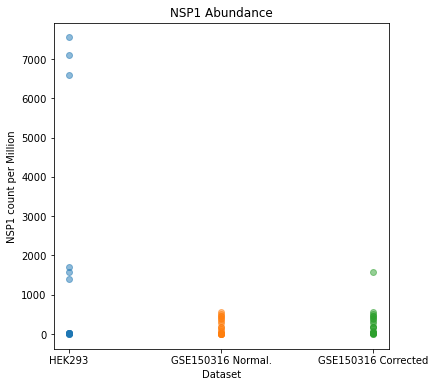

In [22]:
fig, ax = plt.subplots()

ceniklab_nsp1_norm = ceniklab_counts_df.NSP1_per_Mil
ceniklab_x         = [1 for x in ceniklab_nsp1_norm]

ax.plot(ceniklab_x, ceniklab_nsp1_norm, "o", alpha = 0.5)

external_nsp1_norm = external_counts_corrected_df.NSP1_per_Mil
external_x_norm    = [2 for x in external_nsp1_norm]

external_nsp1_corrected      = external_counts_corrected_df.corrected_NSP1
external_x_corrected         = [3 for x in external_nsp1_corrected]

plt.xlabel("Dataset")
plt.ylabel("NSP1 count per Million")
plt.title("NSP1 Abundance")

ax.plot(external_x_norm, external_nsp1_norm, "o", alpha      = 0.5, linewidth = 40);
ax.plot(external_x_corrected, external_nsp1_corrected, "o", alpha = 0.5, linewidth = 40);
plt.xticks((1,2,3), labels = ("HEK293", "GSE150316 Normal.", "GSE150316 Corrected"), rotation = "horizontal");
plt.savefig("NSP1_abundance.pdf")

## Comparison of Cenik Lab and Extrernal Data

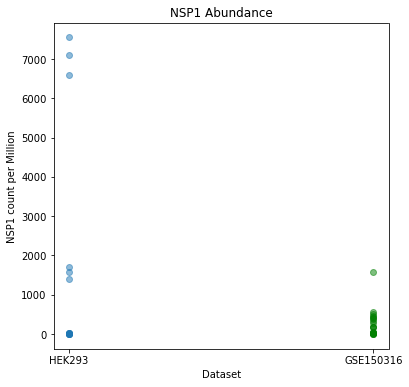

In [23]:
fig, ax = plt.subplots()

ceniklab_nsp1_norm = ceniklab_counts_df.NSP1_per_Mil
ceniklab_x         = [1 for x in ceniklab_nsp1_norm]

ax.plot(ceniklab_x, ceniklab_nsp1_norm, "o", alpha = 0.5)

external_nsp1_corrected = external_counts_corrected_df.corrected_NSP1
external_x         = [2 for x in external_counts_corrected_df.corrected_NSP1]

plt.xlabel("Dataset")
plt.ylabel("NSP1 count per Million")
plt.title("NSP1 Abundance")

ax.plot(external_x, external_nsp1_corrected, "o", alpha = 0.5, color="green", linewidth = 40);
plt.xticks((1,2), labels = ("HEK293", "GSE150316"), rotation = "horizontal");

## GSE159191

In [24]:
GSE159191_counts_df

,NSP1,NSP2,total_mapped,NSP1_per_Mil,NSP2_per_Mil
GSM4822349,0,0,3100098,0.000000,0.000000
GSM4822350,12,28,5348973,2.243421,5.234650
GSM4822353,28498,76135,2284647,12473.699438,33324.623016
GSM4822346,9499,21417,2003245,4741.806419,10691.153603
GSM4822359,101695,140054,1962774,51811.874419,71355.133092
GSM4822356,59092,119845,2155495,27414.584585,55599.757828
GSM4822351,27263,69296,2358321,11560.343142,29383.616564
GSM4822344,0,0,5698488,0.000000,0.000000
GSM4822348,0,0,5382581,0.000000,0.000000
GSM4822345,25540,56954,3199261,7983.093596,17802.236204


GSE159191 dataset contains two cell types: A549 and HEK293T. We decided to plot these separately.

In [25]:
GSE159191_A549    = GSE159191_counts_df.loc[["GSM4822344", "GSM4822345", "GSM4822346", "GSM4822347"]]

GSE159191_HEK293T = GSE159191_counts_df.loc[["GSM4822348", "GSM4822349", "GSM4822350", "GSM4822351","GSM4822352", "GSM4822353", "GSM4822354", "GSM4822355", "GSM4822356", "GSM4822357", "GSM4822358", "GSM4822359"]]


In [26]:
GSE159191_HEK293T

,NSP1,NSP2,total_mapped,NSP1_per_Mil,NSP2_per_Mil
GSM4822348,0,0,5382581,0.000000,0.000000
GSM4822349,0,0,3100098,0.000000,0.000000
GSM4822350,12,28,5348973,2.243421,5.234650
GSM4822351,27263,69296,2358321,11560.343142,29383.616564
GSM4822352,33846,77762,2518442,13439.261258,30877.026352
GSM4822353,28498,76135,2284647,12473.699438,33324.623016
GSM4822354,54746,109077,1989298,27520.260916,54831.905526
GSM4822355,59010,111227,2001718,29479.676957,55565.769004
GSM4822356,59092,119845,2155495,27414.584585,55599.757828
GSM4822357,115524,153512,2006674,57569.889279,76500.717107


In [27]:
GSE159191_A549

,NSP1,NSP2,total_mapped,NSP1_per_Mil,NSP2_per_Mil
GSM4822344,0,0,5698488,0.000000,0.000000
GSM4822345,25540,56954,3199261,7983.093596,17802.236204
GSM4822346,9499,21417,2003245,4741.806419,10691.153603
GSM4822347,14548,31936,1822002,7984.623508,17527.971978


**Note 1:** The above table clearly shows the control experiments as their Nsp1 abundance is either 0 or negligable. We also verified that those cells are labeled as "non-infected" in [GEO](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE159191)

**NOTE 2:** In our plots, we are reporting only experiments coming from transfected cells. So we subset GSE159191 data further.

In [28]:
GSE159191_A549_transfected_df    = GSE159191_counts_df.loc[["GSM4822345", "GSM4822346", "GSM4822347"]]
GSE159191_HEK293T_transfected_df = GSE159191_counts_df.loc[["GSM4822351","GSM4822352", "GSM4822353", 
                                                            "GSM4822354", "GSM4822355", "GSM4822356", 
                                                            "GSM4822357", "GSM4822358", "GSM4822359"]]

We also partition Ceniklab data by cell type:

In [29]:
ceniklab_counts_df

,NSP1,NSP2,total_mapped,NSP1_per_Mil,NSP2_per_Mil
20210318-NSP1-H1299-B,16484,1244,10414385,1582.810699,119.450164
20210318-NSP1-H1299-C,4825,325,2840134,1698.863504,114.431220
20210318-NSP2-H1299-C,31,256879,11777991,2.632028,21810.086287
20210318-NSP2-H1299-B,30,232964,9196661,3.262053,25331.367547
20210318-NSP1-H1299-A,8922,1136,6344717,1406.209292,179.046599
20200717-WT3-RNA-seq-HEK-3-setB,42,491,3030749,13.857961,162.006158
20200717-NSP2-RNA-seq-HEK-1-setB,34,117899,2450175,13.876560,48118.603773
20200717-NSP2-RNA-seq-HEK-3-setB,37,117091,2448191,15.113200,47827.559206
20200717-NSP1-RNA-seq-HEK-3-setB,9432,298,1428006,6605.014265,208.682597
20200717-NSP1-RNA-seq-HEK-1-setB,13645,451,1919963,7106.907789,234.900360


In [30]:
hek_exp_names = [
    "20200717-NSP1-RNA-seq-HEK-1-setB",
    "20200717-NSP1-RNA-seq-HEK-2-setB",
    "20200717-NSP1-RNA-seq-HEK-3-setB",
    "20200717-NSP2-RNA-seq-HEK-1-setB",
    "20200717-NSP2-RNA-seq-HEK-2-setB",
    "20200717-NSP2-RNA-seq-HEK-3-setB",
    "20200717-WT1-RNA-seq-HEK-1-setB",
    "20200717-WT2-RNA-seq-HEK-2-setB",
    "20200717-WT3-RNA-seq-HEK-3-setB"]

hek_transfected_exp_names = [
    "20200717-NSP1-RNA-seq-HEK-1-setB",
    "20200717-NSP1-RNA-seq-HEK-2-setB",
    "20200717-NSP1-RNA-seq-HEK-3-setB"]

h1229_exp_names = [
    "20210318-NSP1-H1299-A",
    "20210318-NSP1-H1299-B",
    "20210318-NSP1-H1299-C",
    "20210318-NSP2-H1299-A",
    "20210318-NSP2-H1299-B",
    "20210318-NSP2-H1299-C"]

h1229_transfected_exp_names = [
    "20210318-NSP1-H1299-A",
    "20210318-NSP1-H1299-B",
    "20210318-NSP1-H1299-C"]


ceniklab_hek_data    = ceniklab_counts_df.loc[hek_exp_names]
ceniklab_h1299_data  = ceniklab_counts_df.loc[h1229_exp_names]

ceniklab_hek_transfected_data    = ceniklab_counts_df.loc[hek_transfected_exp_names]
ceniklab_h1299_transfected_data  = ceniklab_counts_df.loc[h1229_transfected_exp_names]

In [31]:
ceniklab_hek_data.NSP1_per_Mil

20200717-NSP1-RNA-seq-HEK-1-setB    7106.907789
20200717-NSP1-RNA-seq-HEK-2-setB    7550.456248
20200717-NSP1-RNA-seq-HEK-3-setB    6605.014265
20200717-NSP2-RNA-seq-HEK-1-setB      13.876560
20200717-NSP2-RNA-seq-HEK-2-setB      18.650959
20200717-NSP2-RNA-seq-HEK-3-setB      15.113200
20200717-WT1-RNA-seq-HEK-1-setB       15.009529
20200717-WT2-RNA-seq-HEK-2-setB       21.703986
20200717-WT3-RNA-seq-HEK-3-setB       13.857961
Name: NSP1_per_Mil, dtype: float64

## Finalized Comparison of Studies

/home/hakan/miniconda3/envs/ribo/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


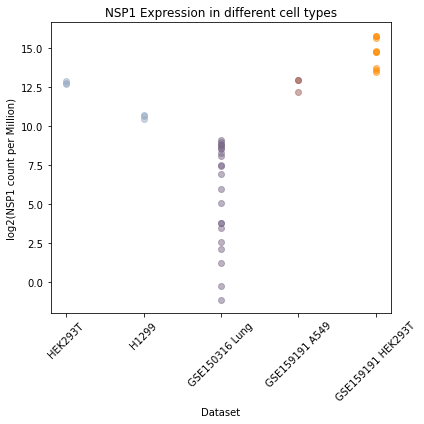

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]

fig, ax = plt.subplots()

#ceniklab_nsp1_norm = ceniklab_counts_df.NSP1_per_Mil
#ceniklab_x         = [1 for x in ceniklab_nsp1_norm]

ceniklab_hek_norm =  np.log2(ceniklab_hek_transfected_data.NSP1_per_Mil)
ceniklab_hek_x    = [1 for x in ceniklab_hek_norm]

ax.plot(ceniklab_hek_x, ceniklab_hek_norm, "o", alpha = 0.5, color = "#98abc5")

ceniklab_h1299_norm =  np.log2(ceniklab_h1299_transfected_data.NSP1_per_Mil)
ceniklab_h1299_x    = [2 for x in ceniklab_h1299_norm]

ax.plot(ceniklab_h1299_x, ceniklab_h1299_norm, "o", alpha = 0.5, color = "#98abc5")

external_nsp1_norm = np.log2(external_counts_df.NSP1_per_Mil)
external_x         = [3 for x in external_nsp1_norm]

plt.xlabel("Dataset")
plt.ylabel("log2(NSP1 count per Million)")
plt.title("NSP1 Expression in different cell types")

ax.plot(external_x, external_nsp1_norm, "o", alpha = 0.5, color="#7b6888", linewidth = 40);

GSE159191_A549_nsp1_norm = np.log2(GSE159191_A549_transfected_df.NSP1_per_Mil)
GSE159191_A549_x         = [4 for x in GSE159191_A549_nsp1_norm]

ax.plot(GSE159191_A549_x, GSE159191_A549_nsp1_norm, "o", alpha = 0.5, color = "#a05d56")

GSE159191_HEK293T_nsp1_norm = np.log2(GSE159191_HEK293T_transfected_df.NSP1_per_Mil)
GSE159191_HEK293T_x         = [5 for x in GSE159191_HEK293T_nsp1_norm]

ax.plot(GSE159191_HEK293T_x, GSE159191_HEK293T_nsp1_norm, "o", alpha = 0.5, color = "#ff8c00")

plt.xticks((1,2,3,4,5), labels = ("HEK293T", "H1299", "GSE150316 Lung", "GSE159191 A549", "GSE159191 HEK293T"), rotation = 45);

plt.tight_layout()
#plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.savefig("NSP1_abundance_comparison.pdf")

**Legend:** Comparison of NSP1 gene expression accross different cell types. 
RNA-Seq data from this study and two publicly available datasets are mapped to NSP1 sequence and the transcriptome.
Each point comes from an experiment from the study indicated in the x-axis.
Nsp1 expression is normalized as follows.
For each experiment, the number of reads mapping to NSP1 was divided by the total number of mapped reads in that experiment, and then multiplied by 1 million. We took the logarithm of the resulting number in base 2. This gave us the number of reads per million, in log2, on the y-axis.
The studies on the x-axis, from left to right, are as follows.
HEK293T and H1299 are the sets of experiments, used in this study, where HEK293T and H1299 cells were transfected with NSP1 vector. GSE150316 contains autopsy samples from deceased beacuse of SARS-Cov2 infection. Only samples from the lungs were used in this comparison. 
GSE159191 A549 and GSE159191 HEK293T contain experiments from lung carcinoma cells and human embryonic kidney cells, respectively, where cells were transfected with SARS-Cov2. GSE150316 and GSE159191 indicate the NCBI GEO accession numbers of the publicly available studies. 